# Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
data_path = '../data/SL20 Two years to Narada.xls'

data = pd.read_excel(data_path, index_col= False)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [62]:
def split_(stock_name):
    return stock_name.split('.')[0]

In [64]:
data['SECURITYCODE'] = data['SECURITYCODE'].apply(lambda x : split_(x))

In [65]:
data.head()

,SECURITYCODE,OPENINGPRICE,HIGHPX,LOWPX,CLOSINGPRICE,TRADEDATE,UNIX_TS
1,VONE,38.5,39.2,38.4,38.9,2024-02-07,1707264000
2,NDB,64.9,64.9,63.9,63.9,2024-02-07,1707264000
3,LLUB,95.0,96.0,92.1,94.4,2024-02-07,1707264000
4,CIC,64.0,64.0,63.0,63.0,2024-02-07,1707264000
5,COMB,88.0,89.0,88.0,89.0,2024-02-07,1707264000


In [66]:
data = data[['SECURITYCODE','OPENINGPRICE','HIGHPX', 'LOWPX', 'CLOSINGPRICE', 'TRADEDATE', 'UNIX_TS']].dropna(axis= 0, how = 'any')
data

,SECURITYCODE,OPENINGPRICE,HIGHPX,LOWPX,CLOSINGPRICE,TRADEDATE,UNIX_TS
1,VONE,38.5,39.20,38.40,38.9,2024-02-07,1707264000
2,NDB,64.9,64.90,63.90,63.9,2024-02-07,1707264000
3,LLUB,95.0,96.00,92.10,94.4,2024-02-07,1707264000
4,CIC,64.0,64.00,63.00,63.0,2024-02-07,1707264000
5,COMB,88.0,89.00,88.00,89.0,2024-02-07,1707264000
...,...,...,...,...,...,...,...
17909,RCL,72.0,73.00,66.50,68.3,2022-02-08,1644278400
17910,SAMP,53.2,53.70,51.70,52.3,2022-02-08,1644278400
17911,VONE,87.0,89.50,79.00,80.5,2022-02-08,1644278400
17912,AAIC,132.5,153.75,125.25,148.5,2022-02-08,1644278400


In [67]:
data.shape

(8903, 7)

In [68]:
data.SECURITYCODE.value_counts()

VONE    469
NDB     469
SAMP    469
RCL     469
MELS    469
LOLC    469
LOFC    469
LIOC    469
JKH     469
HNB     469
HHL     469
HAYL    469
DIAL    469
DFCC    469
COMB    469
LLUB    469
AAIC    469
NTB     465
CIC     465
Name: SECURITYCODE, dtype: int64

In [69]:
symbols = list(data.SECURITYCODE.unique())
# symbols

In [70]:
def plot_ohlc(data, title):
    x_vals = data.TRADEDATE

    fig = make_subplots(rows=1, cols=1, vertical_spacing=0.01 , specs=[[{'rowspan':1, 'type':'Candlestick'}]],shared_xaxes=True)
    ohlc_obj = go.Candlestick(x=x_vals, open = data.OPENINGPRICE, high=data.HIGHPX, low=data.LOWPX, close=data.CLOSINGPRICE, name= title)
    fig.add_trace(ohlc_obj, row = 1, col = 1)
    fig.update_layout(title = title)
    fig.show(config={
        'modeBarButtonsToRemove': ['zoom', 'pan']
    })

# OHLC candles

In [71]:
for symbol in symbols:
    symb_df_ = data.loc[data.SECURITYCODE == symbol].sort_values(by = 'UNIX_TS').dropna(axis= 0, how = 'any')
    plot_ohlc(symb_df_, symbol)
    print()
    

# Volatility calculations

In [72]:
def get_log_returns_v2(df ,close_col , horizon):
  data1 = df[close_col][horizon:].to_numpy()
  data2 = df[close_col][:-horizon].to_numpy()
  df = df.reset_index(drop = True)
  df.loc[horizon:, 'returns'] = data1/data2
  df['log_returns'] = np.log(df['returns'])
  df = df.dropna(axis = 0, how = 'any').reset_index(drop = True)
  return df

In [73]:
def get_std_volatility(df, close_col = 'CLOSINGPRICE', horizon = 5):

    df_out = get_log_returns_v2(df, 'CLOSINGPRICE', 5)
    return_mean = df_out.log_returns.mean()
    return_std = df_out.log_returns.std()

    return return_mean, return_std

In [74]:
for symbol in symbols:
    symb_df = data.loc[data.SECURITYCODE == symbol].sort_values(by = 'UNIX_TS')
    return_mean, return_std = get_std_volatility(symb_df)

    print('weekly return  mean of {} : {}'.format(symbol, return_mean))
    print('weekly return  volatility of {} : {}'.format(symbol, return_std))
    print()

weekly return  mean of VONE : -0.008040656882271622
weekly return  volatility of VONE : 0.09695539975043586

weekly return  mean of NDB : -0.0010372455543869472
weekly return  volatility of NDB : 0.06826352574697281

weekly return  mean of LLUB : -0.0026439451808662885
weekly return  volatility of LLUB : 0.05406279870691399

weekly return  mean of CIC : 0.0009011237657130585
weekly return  volatility of CIC : 0.07280853300462013

weekly return  mean of COMB : 0.0010264171278200522
weekly return  volatility of COMB : 0.05375120501535823

weekly return  mean of DFCC : 0.002647301055014415
weekly return  volatility of DFCC : 0.06443137238632704

weekly return  mean of DIAL : -0.002047095093058515
weekly return  volatility of DIAL : 0.041815795832598895

weekly return  mean of HAYL : -0.005391174479893209
weekly return  volatility of HAYL : 0.07099578510672179

weekly return  mean of HHL : 0.00021408518459514723
weekly return  volatility of HHL : 0.046983455999110746

weekly return  mean o

In [75]:
test_df = data.loc[data.SECURITYCODE == symbols[0]].sort_values(by = 'UNIX_TS').reset_index(drop = True)
# test_df

Garman Klass volatility
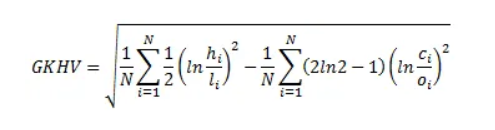

In [76]:
def GKHV(o,h,l,c):

    volatility = (1/2)*((np.log(h/l))**2) - (2*(np.log(2))-1)*((np.log(c/o))**2)

    return volatility

In [77]:
# OPENINGPRICE	HIGHPX	LOWPX	CLOSINGPRICE
test_df['gkhv'] = test_df.apply(lambda row: GKHV(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE']), axis = 1)


In [78]:
test_df.iloc[1]

SECURITYCODE                   VONE
OPENINGPRICE                   81.5
HIGHPX                         82.8
LOWPX                          74.5
CLOSINGPRICE                   75.8
TRADEDATE       2022-02-09 00:00:00
UNIX_TS                  1644364800
gkhv                       0.003548
Name: 1, dtype: object

In [79]:
test_df.head()
np.sqrt(test_df.gkhv.mean())

0.042482850399845055

In [80]:
# test_df['High_Low_Ratio'] = (np.log(test_df['HIGHPX'] / test_df['LOWPX']) ** 2)*0.5

# # Calculate log ratio of close to open, and apply 0.366 factor
# test_df['Close_Open_Ratio'] = ((2*(np.log(2))-1) * (np.log(test_df['CLOSINGPRICE'] / test_df['OPENINGPRICE'])) ** 2)

# # Sum the squared values
# sum_squared_values = test_df['High_Low_Ratio'].sum() - test_df['Close_Open_Ratio'].sum()

# # Divide by the number of periods
# num_periods = len(test_df)
# mean_squared_values = sum_squared_values / num_periods

# # Take square root to get volatility
# volatility = np.sqrt(mean_squared_values)

# volatility

## Rogers and Satchell
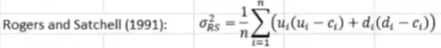

In [81]:
def RS(o,h,l,c,prev_c):

    u = h/o
    c = c/o
    d = l/o


    volatility = u*(u-c) + d*(d-c)

    return volatility


In [82]:
# OPENINGPRICE HIGHPX LOWPX CLOSINGPRICE

test_df['prev_c'] = test_df['CLOSINGPRICE'].shift(1)
test_df['rs'] = test_df.apply(lambda row: RS(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE'], row['prev_c']), axis = 1)


In [83]:
test_df.head()

np.sqrt(test_df.rs.mean())


0.1111997301198906

## Yand and Zhang
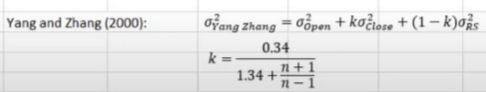

In [84]:
test_df['norm_o'] = test_df['OPENINGPRICE']/test_df['CLOSINGPRICE'].shift(1)
test_df['norm_c'] = test_df['CLOSINGPRICE']/test_df['OPENINGPRICE']
k = (0.34/(1.34 + ((len(test_df)+1)/(len(test_df)-1))))
yangzhang = np.sqrt((test_df['norm_o'].std()**2) + (k*test_df['norm_c'].std()**2) + (1-k)*test_df['rs'].mean())

yangzhang


0.10650923893896444

In [85]:
test_df['norm_o'].std()

0.02384355564087753

In [86]:
symbol_volatilities = pd.DataFrame()
v_dict = {}
for symbol in symbols:
    # print(symbol)
    v_dict['symbol'] = symbol

    symbol_df = data.loc[data.SECURITYCODE == symbol].sort_values(by = 'UNIX_TS').reset_index(drop = True)
    
    symbol_df['gkhv'] = symbol_df.apply(lambda row: GKHV(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE']), axis = 1)
    gkhv = np.sqrt(symbol_df.gkhv.mean())
    v_dict['gkhv'] = gkhv

    symbol_df['prev_c'] = symbol_df['CLOSINGPRICE'].shift(1)
    symbol_df['rs'] = symbol_df.apply(lambda row: RS(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE'], row['prev_c']), axis = 1)
    rs = np.sqrt(symbol_df.rs.mean())
    v_dict['rs'] = rs

    symbol_df['norm_o'] = symbol_df['OPENINGPRICE']/symbol_df['CLOSINGPRICE'].shift(1)
    symbol_df['norm_c'] = symbol_df['CLOSINGPRICE']/symbol_df['OPENINGPRICE']
    k = (0.34/(1.34 + ((len(symbol_df)+1)/(len(symbol_df)-1))))
    yangzhang = np.sqrt((symbol_df['norm_o'].std()**2) + (k*symbol_df['norm_c'].std()**2) + (1-k)*symbol_df['rs'].mean())
    v_dict['yangzhang'] = yangzhang

    symbol_volatilities = pd.concat([symbol_volatilities, pd.DataFrame([v_dict])], ignore_index = True)

In [87]:
symbol_volatilities

,symbol,gkhv,rs,yangzhang
0,VONE,0.042483,0.111200,0.106509
1,NDB,0.027223,0.093108,0.088289
2,LLUB,0.022423,0.069301,0.065922
3,CIC,0.032106,0.098182,0.095167
4,COMB,0.021794,0.068825,0.065263
5,DFCC,0.026524,0.058644,0.057858
6,DIAL,0.020142,0.064208,0.061348
7,HAYL,0.028642,0.072802,0.070341
8,HHL,0.021373,0.059471,0.057250
9,HNB,0.021273,0.058564,0.056528


In [88]:
symbol_df = data.loc[data.SECURITYCODE == symbols[0]].sort_values(by = 'UNIX_TS').reset_index(drop = True)
symbol_df

,SECURITYCODE,OPENINGPRICE,HIGHPX,LOWPX,CLOSINGPRICE,TRADEDATE,UNIX_TS
0,VONE,87.0,89.5,79.0,80.5,2022-02-08,1644278400
1,VONE,81.5,82.8,74.5,75.8,2022-02-09,1644364800
2,VONE,76.0,80.4,73.2,77.6,2022-02-10,1644451200
3,VONE,78.9,82.9,78.8,81.8,2022-02-11,1644537600
4,VONE,83.0,84.4,79.6,80.7,2022-02-14,1644796800
...,...,...,...,...,...,...,...
464,VONE,36.1,36.1,35.0,35.3,2024-01-31,1706659200
465,VONE,35.3,38.2,35.3,37.3,2024-02-01,1706745600
466,VONE,38.0,38.0,37.0,37.9,2024-02-02,1706832000
467,VONE,38.0,38.7,38.0,38.6,2024-02-06,1707177600


# Drowdown

In [89]:
# returns percentage
def max_drowdown(close):
    max_prs = close.rolling(window = len(symb_df), min_periods = 1).max()
    dd = (close/max_prs) - 1
    max_dd = dd.rolling(window = len(dd), min_periods=1).min()
    return max_dd.min()*100


In [90]:
symbol_df

,SECURITYCODE,OPENINGPRICE,HIGHPX,LOWPX,CLOSINGPRICE,TRADEDATE,UNIX_TS
0,VONE,87.0,89.5,79.0,80.5,2022-02-08,1644278400
1,VONE,81.5,82.8,74.5,75.8,2022-02-09,1644364800
2,VONE,76.0,80.4,73.2,77.6,2022-02-10,1644451200
3,VONE,78.9,82.9,78.8,81.8,2022-02-11,1644537600
4,VONE,83.0,84.4,79.6,80.7,2022-02-14,1644796800
...,...,...,...,...,...,...,...
464,VONE,36.1,36.1,35.0,35.3,2024-01-31,1706659200
465,VONE,35.3,38.2,35.3,37.3,2024-02-01,1706745600
466,VONE,38.0,38.0,37.0,37.9,2024-02-02,1706832000
467,VONE,38.0,38.7,38.0,38.6,2024-02-06,1707177600


# Returns

In [91]:
def find_act_fday(symbol_df ,possible_dates):

    for pos_date in possible_dates:
    # print(pos_date)
        if pos_date in symbol_df.TRADEDATE.values:
            break
    return pos_date

## get_yr_2_date

In [92]:
#returns the percentage value
def get_yr_2_date(symbol_df):
    fday = pd.Timestamp(datetime((pd.Timestamp.today().year),1,1).date())
    possible_dates = pd.bdate_range(fday, fday+pd.offsets.BusinessDay(n=5))

    act_fday = find_act_fday(symbol_df,possible_dates)
    
    fday_value = symbol_df.loc[symbol_df.TRADEDATE == act_fday].CLOSINGPRICE.iloc[0]
    today_value = symbol_df.iloc[-1].CLOSINGPRICE

    yr_2_dt_return = (today_value - fday_value)/fday_value

    yr_2_date_df = symbol_df[symbol_df.TRADEDATE >= act_fday]
    max_dd = max_drowdown(yr_2_date_df['CLOSINGPRICE'])

    return yr_2_dt_return*100, max_dd

## get_yr

In [93]:
# returns the percentage value
def get_yr(symbol_df):

    fday = symbol_df.TRADEDATE.iloc[-1] - pd.DateOffset(years=1)
    possible_dates = pd.bdate_range(fday, fday+pd.offsets.BusinessDay(n=5))

    act_fday = find_act_fday(symbol_df,possible_dates)
    
    fday_value = symbol_df.loc[symbol_df.TRADEDATE == act_fday].CLOSINGPRICE.iloc[0]
    today_value = symbol_df.iloc[-1].CLOSINGPRICE

    yr_return = (today_value - fday_value)/fday_value
    yr_df = symbol_df[symbol_df.TRADEDATE >= act_fday]
    max_dd = max_drowdown(yr_df['CLOSINGPRICE'])

    return yr_return*100, max_dd

## get_mn

In [94]:
# returns the percentage value
def get_mn(symbol_df):

    fday = symbol_df.TRADEDATE.iloc[-1] - pd.DateOffset(months=1)
    possible_dates = pd.bdate_range(fday, fday+pd.offsets.BusinessDay(n=5))

    act_fday = find_act_fday(symbol_df,possible_dates)
    
    fday_value = symbol_df.loc[symbol_df.TRADEDATE == act_fday].CLOSINGPRICE.iloc[0]
    today_value = symbol_df.iloc[-1].CLOSINGPRICE

    mn_return = (today_value - fday_value)/fday_value
    mn_df = symbol_df[symbol_df.TRADEDATE >= act_fday]
    max_dd = max_drowdown(mn_df['CLOSINGPRICE'])

    return mn_return*100, max_dd

In [95]:
get_yr_2_date(symbol_df)

(1.832460732984282, -9.278350515463906)

In [96]:
get_yr(symbol_df)

(19.32515337423312, -31.115459882583163)

In [97]:
get_mn(symbol_df)

(3.7333333333333294, -6.133333333333324)

In [98]:
def get_insights(symbol):
    insight_dict = {}
    symbol_df = data.loc[data.SECURITYCODE == symbol].sort_values(by = 'UNIX_TS')
    symbol_df['gkhv'] = symbol_df.apply(lambda row: GKHV(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE']), axis = 1)
    insight_dict['gkhv'] = np.sqrt(test_df.gkhv.mean())

    symbol_df['prev_c'] = symbol_df['CLOSINGPRICE'].shift(1)
    symbol_df['rs'] = symbol_df.apply(lambda row: RS(row['OPENINGPRICE'],row['HIGHPX'],row['LOWPX'],row['CLOSINGPRICE'], row['prev_c']), axis = 1)
    insight_dict['rs'] = np.sqrt(symbol_df.rs.mean())

    symbol_df['norm_o'] = symbol_df['OPENINGPRICE']/symbol_df['CLOSINGPRICE'].shift(1)
    symbol_df['norm_c'] = symbol_df['CLOSINGPRICE']/symbol_df['OPENINGPRICE']
    k = (0.34/(1.34 + ((len(symbol_df)+1)/(len(symbol_df)-1))))
    insight_dict['yangzhang'] = np.sqrt((symbol_df['norm_o'].std()**2) + (k*symbol_df['norm_c'].std()**2) + (1-k)*symbol_df['rs'].mean())

    insight_dict['yr_2_dt_return'], insight_dict['yr_2_dt_mx_dd'] = get_yr_2_date(symbol_df)
    insight_dict['yr_return'], insight_dict['yr_mx_dd'] = get_yr(symbol_df)
    insight_dict['mn_return'], insight_dict['mn_mx_dd'] = get_mn(symbol_df)

    return insight_dict

In [99]:
get_insights(symbols[5])

{'gkhv': 0.042482850399845055,
 'rs': 0.05864430833254257,
 'yangzhang': 0.057858298604229495,
 'yr_2_dt_return': -3.018867924528309,
 'yr_2_dt_mx_dd': -9.433962264150942,
 'yr_return': 102.89473684210523,
 'yr_mx_dd': -23.2409381663113,
 'mn_return': -0.2587322121604177,
 'mn_mx_dd': -8.860759493670889}

In [100]:
symb_df_ = data.loc[data.SECURITYCODE == symbols[5]].sort_values(by = 'UNIX_TS').dropna(axis= 0, how = 'any')
plot_ohlc(symb_df_, symbols[5])

In [101]:
symbols

['VONE',
 'NDB',
 'LLUB',
 'CIC',
 'COMB',
 'DFCC',
 'DIAL',
 'HAYL',
 'HHL',
 'HNB',
 'JKH',
 'LIOC',
 'LOFC',
 'LOLC',
 'MELS',
 'NTB',
 'RCL',
 'SAMP',
 'AAIC']

In [102]:
import gradio as gr
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

In [103]:
encoded_stock_data_path = '../data/sl20.xlsx'
# stock_data = pd.read_csv(encoded_stock_data_path)
stock_data = pd.read_excel(encoded_stock_data_path)

In [104]:
stock_data = stock_data.fillna('unknown')

In [105]:
stock_data['symbol'] = stock_data['symbol'].str.replace(r"(","")
stock_data['symbol'] = stock_data['symbol'].str.replace(r")","")

C:\Users\bpadmin\AppData\Local\Temp\ipykernel_17080\996691076.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\bpadmin\AppData\Local\Temp\ipykernel_17080\996691076.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [106]:
embeddings = HuggingFaceEmbeddings()

In [107]:
stock_meta_data = [{'symbol': stock_data.iloc[idx]['symbol'], 'name' : stock_data.iloc[idx]['name']} for idx in range(stock_data.shape[0])]
# stock_meta_data

In [108]:
embeddings = HuggingFaceEmbeddings()

new_db = FAISS.load_local("../vector_db/faiss_sl20_index", embeddings)

In [109]:
def get_recommendations(query, top_k):
  relevant_stocks = new_db.similarity_search_with_relevance_scores(query= query, k = top_k)
  recommendations = [(relevant_stocks[idx][0].metadata.get('symbol'), relevant_stocks[idx][0].metadata.get('name')) for idx in range(len(relevant_stocks))]
  for idx, data in enumerate(recommendations):
    print('{}. {} : {}'.format(idx+1, data[0], data[1]))


In [110]:
stock_pref = 'businesses in the domain of shipping and logistics'

get_recommendations(stock_pref, top_k = 5)

1. JKH : JOHN KEELLS HOLDINGS PLC
2. LOLC : L O L C HOLDINGS PLC
3. LIOC : LANKA IOC PLC
4. COMB : COMMERCIAL BANK OF CEYLON PLC
5. NTB : NATIONS TRUST BANK PLC


In [111]:
def quey_generator(domains):
    query = 'business that belong in the domains of '+','.join(domains)
    return query

def get_recommendations_gradio(domains, top_k = 5):
  query = quey_generator(domains)
  relevant_stocks = new_db.similarity_search_with_relevance_scores(query= query, k = top_k)
  recommendations = [(relevant_stocks[idx][0].metadata.get('symbol'), relevant_stocks[idx][0].metadata.get('name')) for idx in range(len(relevant_stocks))]

  reco_list = []
  for idx, data in enumerate(recommendations):
    reco_list.append('{}. {} : {}'.format(idx+1, data[0], data[1]))
  
  
  return_str = '\n'.join(reco_list)

  return return_str

In [112]:
demo = gr.Interface(
    fn = get_recommendations_gradio,
    inputs = gr.Dropdown(
            ["finance", "transport", "technology","agriculture"],
              multiselect=True,
             label="Domains",
             allow_custom_value = True,
             scale=5
        ),
    # outputs = ["text"],
    outputs = gr.Textbox(label = 'Recommendations')
)
demo.launch(share = True)

# businesses in the domain of shipping and logistics

Running on local URL:  http://127.0.0.1:7866

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


# Sandbox

In [113]:
sys.exit()

SystemExit: 

c:\Users\bpadmin\anaconda3\envs\tf_tr_recommender\lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
aapl_path = '../data/NVDA.csv'

aapl = pd.read_csv(aapl_path, index_col = False)


In [ ]:
aapl.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.401339,0.447922,0.355949,0.376255,271468800,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.406116,0.420449,0.376255,0.415672,51048000,0.0,0.0


In [ ]:
# OPENINGPRICE	HIGHPX	LOWPX	CLOSINGPRICE
aapl['gkhv'] = aapl.apply(lambda row: GKHV(row['Open'],row['High'],row['Low'],row['Close']), axis = 1)


In [ ]:
new_appl = aapl.iloc[-500:].copy()

In [ ]:
new_appl['gkhv'] = new_appl.apply(lambda row: GKHV(row['Open'],row['High'],row['Low'],row['Close']), axis = 1)
new_appl.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,gkhv
5785,2022-01-18 00:00:00-05:00,262.238339,266.013132,257.345093,258.673248,42427000,0.0,0.0,0.000476
5786,2022-01-19 00:00:00-05:00,260.430825,265.064419,250.174965,250.324753,48831500,0.0,0.0,0.001066


In [ ]:
new_appl.gkhv.mean()

0.0007320651126297455

In [ ]:
np.sqrt(new_appl.gkhv.mean())

0.0270567018062022